<a href="https://colab.research.google.com/github/MSHDZ1/Q_late-night/blob/main/ML_V4_OCT24%208%3A24%20PM%20HW3_For_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
# feel free to add more if you need

In [4]:
# load data
data_raw = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding = "ISO-8859-1")

# load data description
data_description = pd.read_csv('/content/DescriptionDataCoSupplyChain.csv', encoding = "ISO-8859-1")

Learning the Variables

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)?
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [5]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [6]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [7]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City',
               'Customer Country', 'Customer Email',
               'Customer Fname', 'Customer Lname',
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [8]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [9]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


In [10]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id',
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude',
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [11]:
data_raw.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


Check for duplicate observations

In [12]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [13]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(180519, 21)

Check for missing values after removing redundent features

In [14]:
data_raw.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Customer Segment,0
order date (DateOrders),0
Order Item Discount,0


Plot a correlation heatmap

<Axes: >

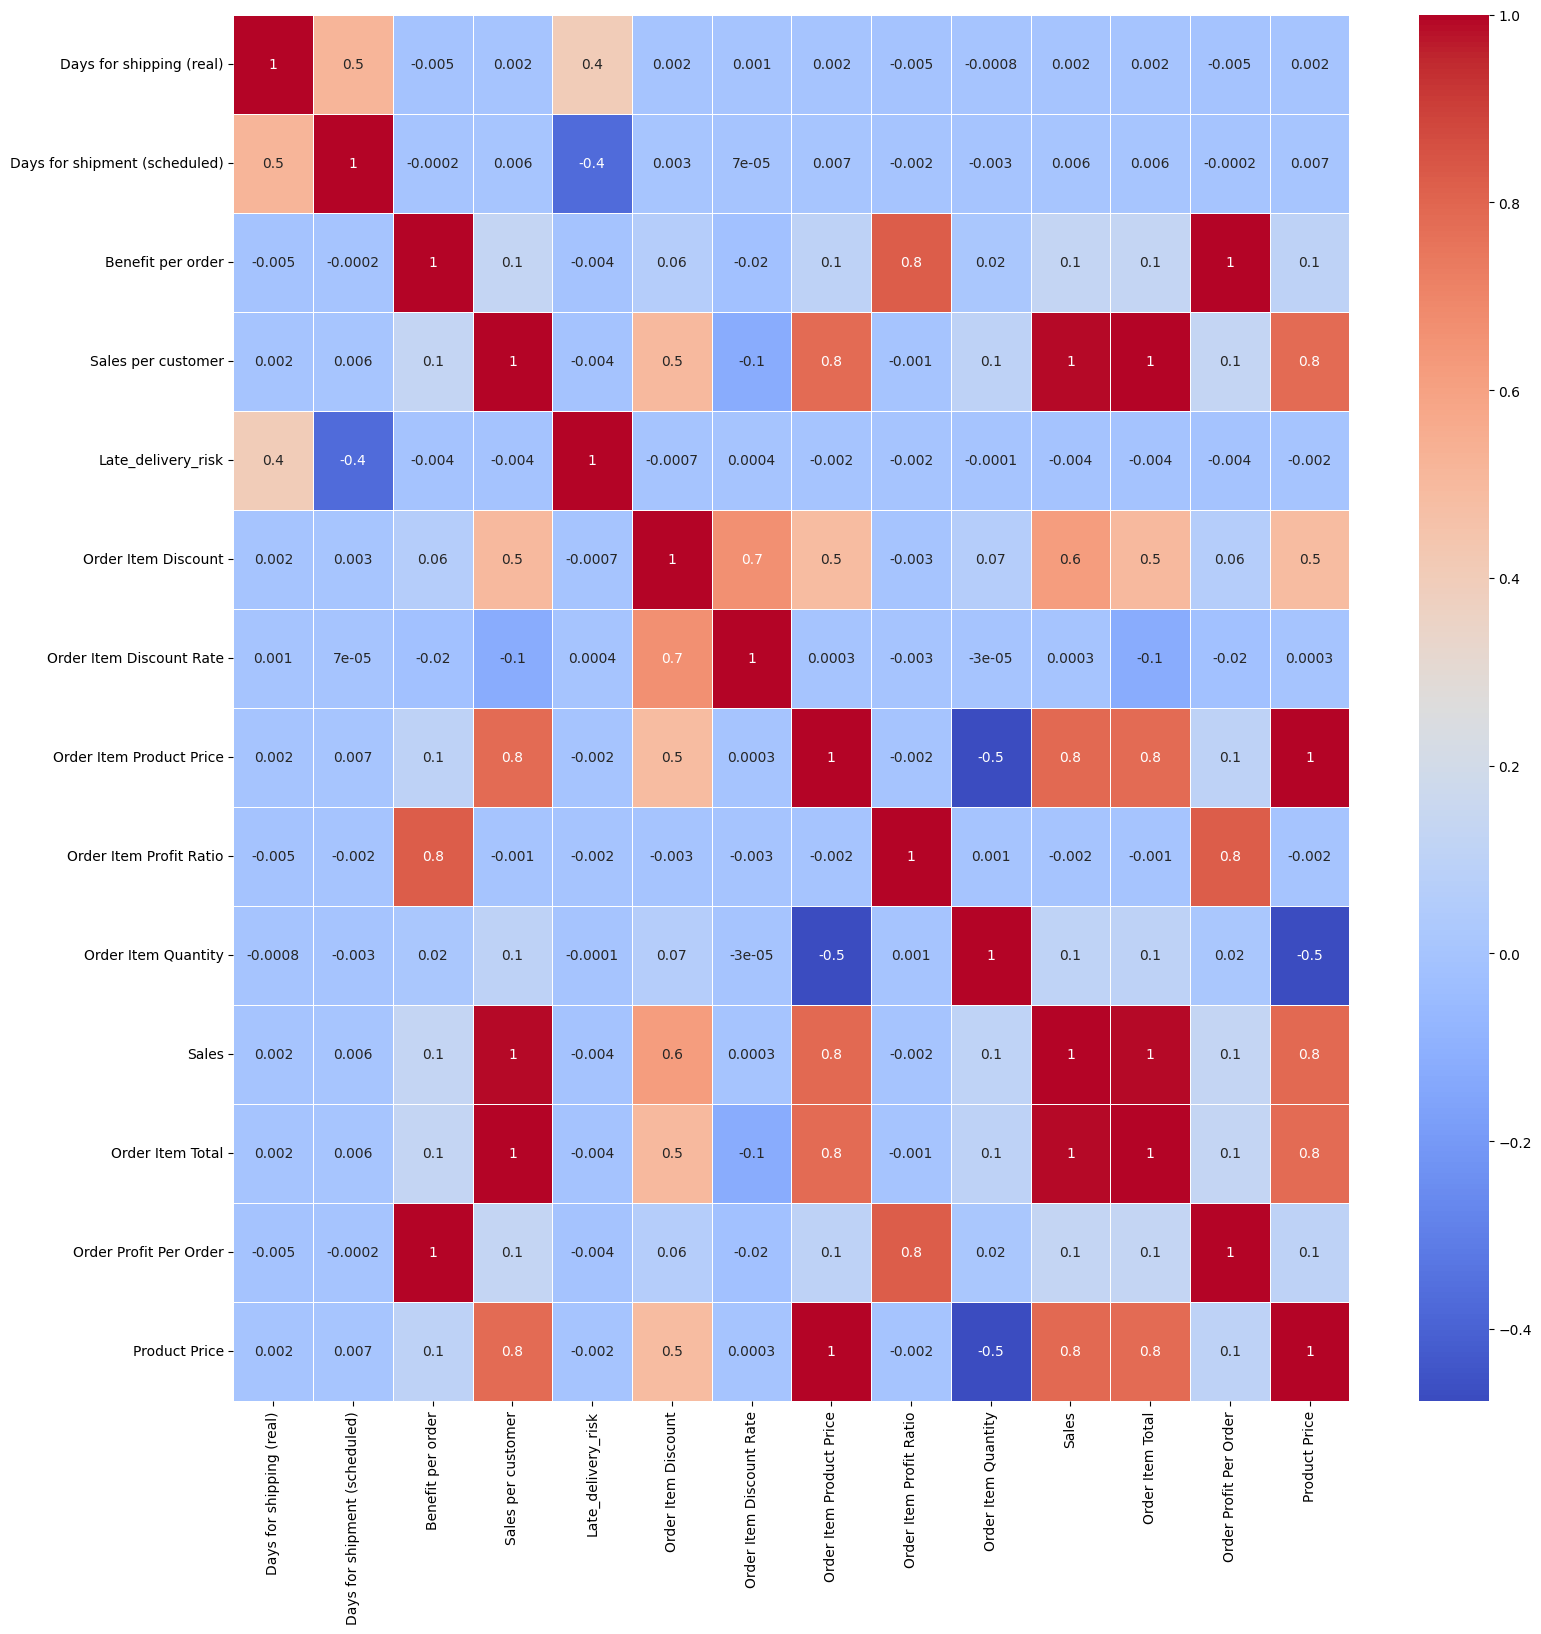

In [15]:
fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Encodings

In [16]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Customer Segment               180519 non-null  object 
 7   order date (DateOrders)        180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Product Price       180519 non-null  float64
 11  Order Item Profit Ratio        180519 non-null  float64
 12  Order Item Quantity           

Detect / Remove / Replace Outliers (if any)

In [17]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<Axes: xlabel='value', ylabel='variable'>

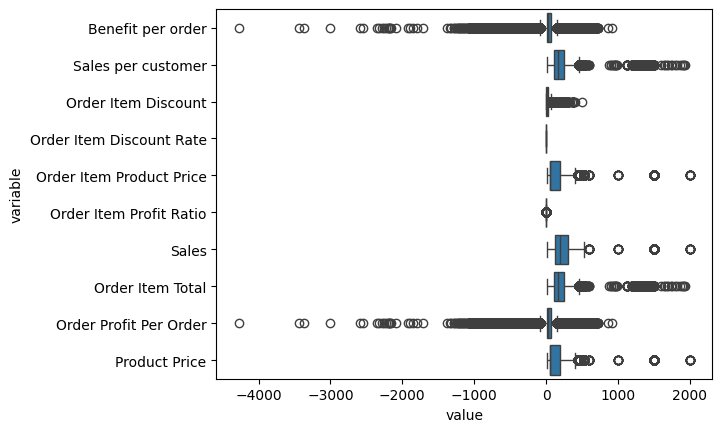

In [18]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [19]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


Outliers length in ' Sales per customer ' from Z-scores method:  477
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


Outliers length in ' Order Item Discount ' from Z-scores method:  2106
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from Z-scores method:  []


Outliers length in ' Order Item Product Price ' from Z-scores method:  488
10 Outliers Sample in '

In [20]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  18942
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3442.5, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25]


Outliers length in ' Sales per customer ' from IQR method:  1943
10 Outliers Sample in ' Sales per customer ' from IQR method:  [463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963]


Outliers length in ' Order Item Discount ' from IQR method:  7537
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [67.48999786, 67.48999786, 67.48999786, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  2048
10 Outliers Sample in ' Order Item Pr

In [21]:
# Removing outliers from z-score method and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  2106
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  488
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  6013
Outliers have been removed and replaced with median
Outliers length in ' Sales ' from Z-scores method:  467
Outliers have been removed and replaced with median
Outliers length in ' Order Item Total ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Pr

0         3
1         5
2         4
3         3
4         2
         ..
180514    4
180515    3
180516    5
180517    3
180518    4
Name: Order Processing Time, Length: 180519, dtype: int64


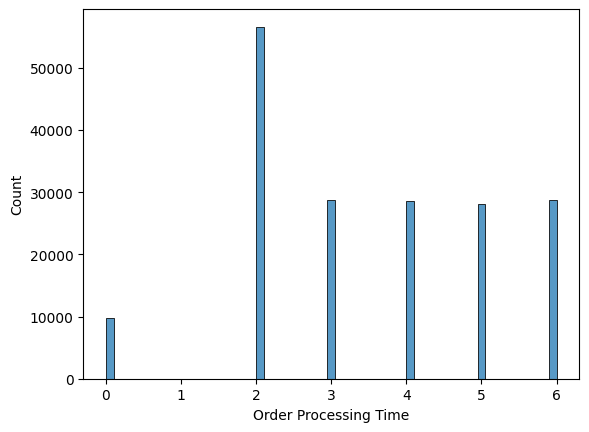

In [41]:
#Engineered Feature 1: Order Processing Time
ohe_data['Order Processing Time'] = (pd.to_datetime(ohe_data['shipping date (DateOrders)']) -
                                     pd.to_datetime(ohe_data['order date (DateOrders)'])).dt.days
print(ohe_data['Order Processing Time'])
plot = sns.histplot(ohe_data['Order Processing Time'])

0        -1
1         1
2         0
3        -1
4        -2
         ..
180514    0
180515    1
180516    1
180517   -1
180518    0
Name: Delivery Time Variance, Length: 180519, dtype: int64


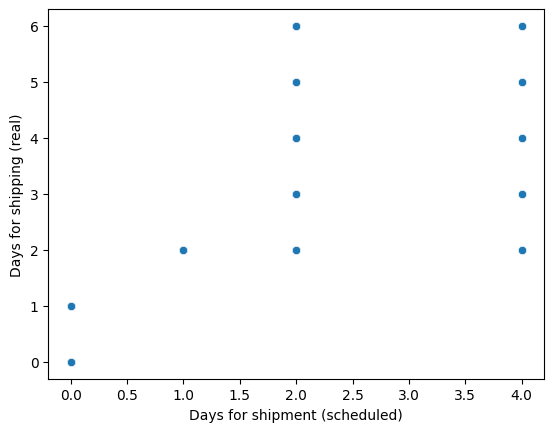

In [43]:
#Engineered Feature 2: Delivery Time Variance
ohe_data['Delivery Time Variance'] = ohe_data['Days for shipping (real)'] - ohe_data['Days for shipment (scheduled)']
print(ohe_data['Delivery Time Variance'])

#plot scatterplot
plot = sns.scatterplot(x='Days for shipment (scheduled)', y='Days for shipping (real)', data=ohe_data)

0          91.250000
1        -249.089996
2        -247.779999
3          22.860001
4         134.210007
             ...    
180514     40.000000
180515     31.520000
180516    141.110001
180517    186.229996
180518    168.949997
Name: Profit per Product Unit, Length: 180519, dtype: float64


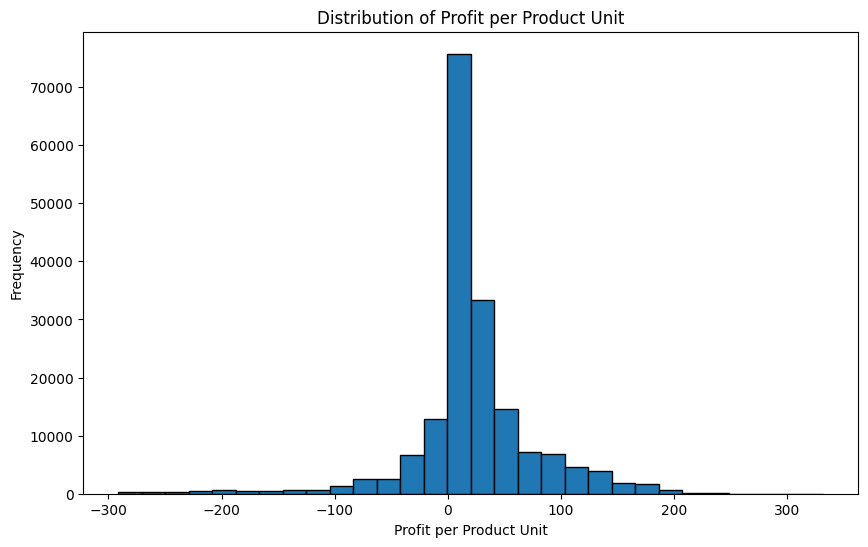

In [68]:
#Engineered Feature 3: Profit per Product Unit
ohe_data['Profit per Product Unit'] = ohe_data['Order Profit Per Order'] / ohe_data['Order Item Quantity']
print(ohe_data['Profit per Product Unit'])

import matplotlib.pyplot as plt

# Histogram of Profit per Product Unit
plt.figure(figsize=(10, 6))
plt.hist(ohe_data['Profit per Product Unit'], bins=30, edgecolor='black')
plt.title("Distribution of Profit per Product Unit")
plt.xlabel("Profit per Product Unit")
plt.ylabel("Frequency")
plt.show()


In [71]:
#Engineered Feature 4: Historical Delivery Performance
# Confirm column names and then calculate the rolling average within each group
# Create a single 'Shipping Mode' column based on the one-hot encoded columns
ohe_data['Shipping Mode'] = (
    ohe_data[['Shipping Mode_First Class', 'Shipping Mode_Same Day',
              'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']]
    .idxmax(axis=1)  # Find the column with the highest value (1)
    .str.replace('Shipping Mode_', '')  # Remove the prefix to get the original mode names
)

# Now calculate the rolling average for 'Late_delivery_risk' by 'Customer Segment' and 'Shipping Mode'
ohe_data['Historical_Delivery_Performance'] = (
    ohe_data.sort_values(['Customer Segment', 'Shipping Mode'])  # Sort values by group
    .groupby(['Customer Segment', 'Shipping Mode'])['Late_delivery_risk']
    .apply(lambda x: x.rolling(window=5, min_periods=1).mean())
    .reset_index(level=[0, 1], drop=True)  # Drop the grouping index
)

print(ohe_data['Historical_Delivery_Performance'])



0         0.000000
1         0.500000
2         0.333333
3         0.000000
4         0.000000
            ...   
180514    0.200000
180515    1.000000
180516    0.200000
180517    0.000000
180518    0.000000
Name: Historical_Delivery_Performance, Length: 180519, dtype: float64


0         0
1         4
2         0
3         0
4         0
         ..
180514    0
180515    2
180516    4
180517    0
180518    0
Name: Mode_Distance_Delay_Risk, Length: 180519, dtype: int64


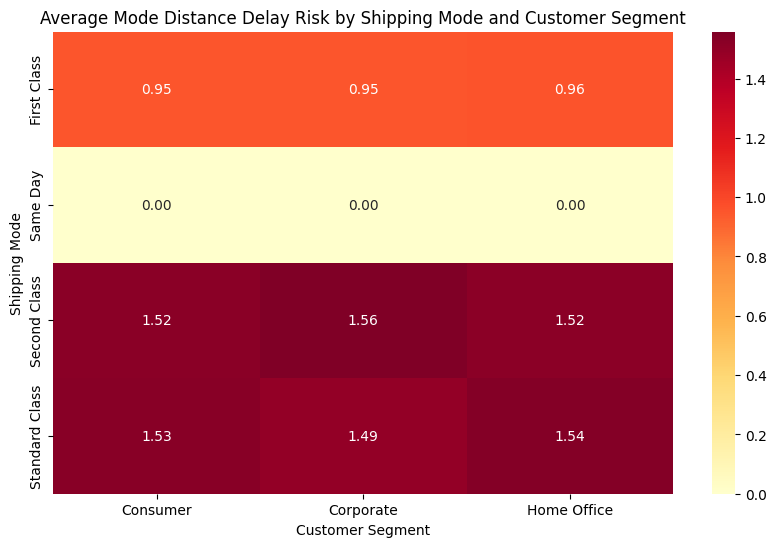

In [72]:
#Engineered Feature 5: Delay Risk by Shipping Mode and Distance Proxy
ohe_data['Mode_Distance_Delay_Risk'] = ohe_data['Days for shipment (scheduled)'] * ohe_data['Late_delivery_risk']
print(ohe_data['Mode_Distance_Delay_Risk'])

# Calculate average Mode_Distance_Delay_Risk for each combination of Shipping Mode and Customer Segment
risk_pivot = ohe_data.pivot_table(
    values='Mode_Distance_Delay_Risk',
    index='Shipping Mode',
    columns='Customer Segment',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(risk_pivot, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Average Mode Distance Delay Risk by Shipping Mode and Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Shipping Mode")
plt.show()

In [31]:
#Engineered Feature 6: Average Customer Order Value
ohe_data['Average_Order_Value'] = ohe_data['Sales per customer'] / ohe_data.groupby('Customer Segment')['Order Item Quantity'].transform('count')
print(ohe_data['Average_Order_Value'])

0         0.003365
1         0.003330
2         0.003312
3         0.009459
4         0.005444
            ...   
180514    0.012412
180515    0.007227
180516    0.007154
180517    0.004149
180518    0.004107
Name: Average_Order_Value, Length: 180519, dtype: float64


In [38]:
#Engineered Feature 7: Shipping Mode Efficiency Score
total_deliveries = ohe_data.groupby('Shipping Mode')['Late_delivery_risk'].count()
late_deliveries = ohe_data.groupby('Shipping Mode')['Late_delivery_risk'].sum()
ohe_data['Shipping_Mode_Efficiency'] = ohe_data['Shipping Mode'].map((late_deliveries / total_deliveries).to_dict())

print(ohe_data['Shipping_Mode_Efficiency'])

0         0.380717
1         0.380717
2         0.380717
3         0.380717
4         0.380717
            ...   
180514    0.380717
180515    0.766328
180516    0.380717
180517    0.380717
180518    0.380717
Name: Shipping_Mode_Efficiency, Length: 180519, dtype: float64


In [39]:
# Display all column names in the DataFrame
print("Columns in the DataFrame:")
for col in ohe_data.columns:
    print(col)


Columns in the DataFrame:
Days for shipping (real)
Days for shipment (scheduled)
Benefit per order
Sales per customer
Delivery Status
Late_delivery_risk
Customer Segment
order date (DateOrders)
Order Item Discount
Order Item Discount Rate
Order Item Product Price
Order Item Profit Ratio
Order Item Quantity
Sales
Order Item Total
Order Profit Per Order
Order Status
Product Price
shipping date (DateOrders)
Type_CASH
Type_DEBIT
Type_PAYMENT
Type_TRANSFER
Shipping Mode_First Class
Shipping Mode_Same Day
Shipping Mode_Second Class
Shipping Mode_Standard Class
Order Processing Time
Delivery Time Variance
Profit per Product Unit
Mode_Distance_Delay_Risk
Average_Order_Value
Shipping Mode
Historical_Delivery_Performance
Shipping_Mode_Efficiency


In [40]:
# Display all column names in a single line
print("Columns in the DataFrame:", list(ohe_data.columns))


Columns in the DataFrame: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Customer Segment', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Status', 'Product Price', 'shipping date (DateOrders)', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class', 'Order Processing Time', 'Delivery Time Variance', 'Profit per Product Unit', 'Mode_Distance_Delay_Risk', 'Average_Order_Value', 'Shipping Mode', 'Historical_Delivery_Performance', 'Shipping_Mode_Efficiency']


Correlations with Late_delivery_risk:
Late_delivery_risk                 1.000000
Delivery Time Variance             0.777644
Mode_Distance_Delay_Risk           0.770830
Historical_Delivery_Performance    0.631655
Shipping_Mode_Efficiency           0.457090
Days for shipping (real)           0.401415
Order Processing Time              0.377516
Shipping Mode_First Class          0.347259
Shipping Mode_Second Class         0.215689
Type_DEBIT                         0.037884
Type_PAYMENT                       0.029746
Type_CASH                          0.012651
Order Item Discount Rate           0.000404
Profit per Product Unit            0.000305
Product Price                      0.000160
Order Item Product Price           0.000160
Order Item Discount                0.000106
Order Item Quantity               -0.000139
Order Item Profit Ratio           -0.000296
Average_Order_Value               -0.000355
Order Profit Per Order            -0.001089
Benefit per order                 -0.0

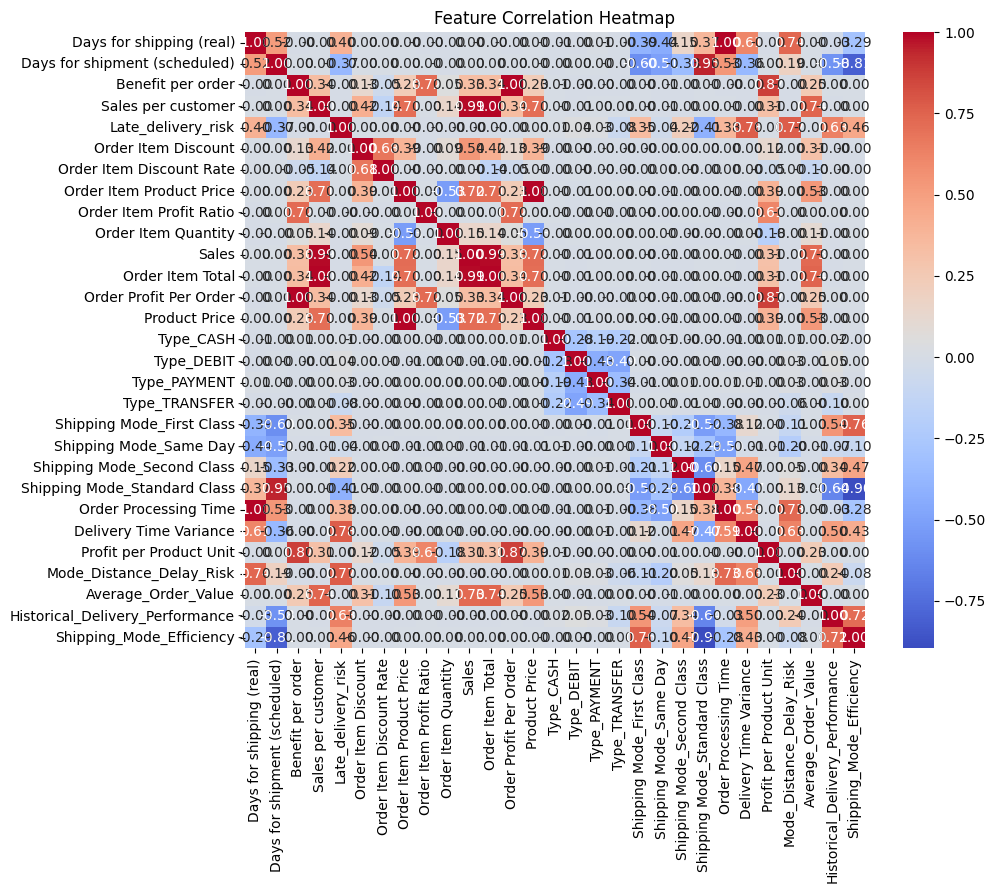

In [45]:
# Filter numeric columns only for correlation calculation
numeric_data = ohe_data.select_dtypes(include=['number'])

# Calculate correlations with 'Late_delivery_risk'
correlations = numeric_data.corr()['Late_delivery_risk'].sort_values(ascending=False)

# Print correlations with Late_delivery_risk to examine each feature's relevance
print("Correlations with Late_delivery_risk:")
print(correlations)

# Visualize the correlations as a heatmap for a more intuitive look
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



In [51]:
print("Class distribution in Late_delivery_risk:")
print(y.value_counts(normalize=True))


Class distribution in Late_delivery_risk:
Late_delivery_risk
1    0.548291
0    0.451709
Name: proportion, dtype: float64


In [56]:
# Define the target based on Delivery Time Variance
ohe_data['Late_Delivery'] = (ohe_data['Delivery Time Variance'] > 0).astype(int)

# Now use 'Late_Delivery' as the target variable
y = ohe_data['Late_Delivery']

# You can then proceed with feature selection and model training as before
# For example, using the high-relevance features (excluding Delivery Time Variance) with the new target
high_relevance_features_no_leakage = [
    'Mode_Distance_Delay_Risk', 'Shipping_Mode_Efficiency', 'Order Processing Time'
]

# Prepare data
X = ohe_data[high_relevance_features_no_leakage]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Evaluation with Delivery Time Variance as Target:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Evaluation with Delivery Time Variance as Target:
Accuracy: 0.9574931678853682
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     23071
           1       1.00      0.93      0.96     31085

    accuracy                           0.96     54156
   macro avg       0.95      0.96      0.96     54156
weighted avg       0.96      0.96      0.96     54156



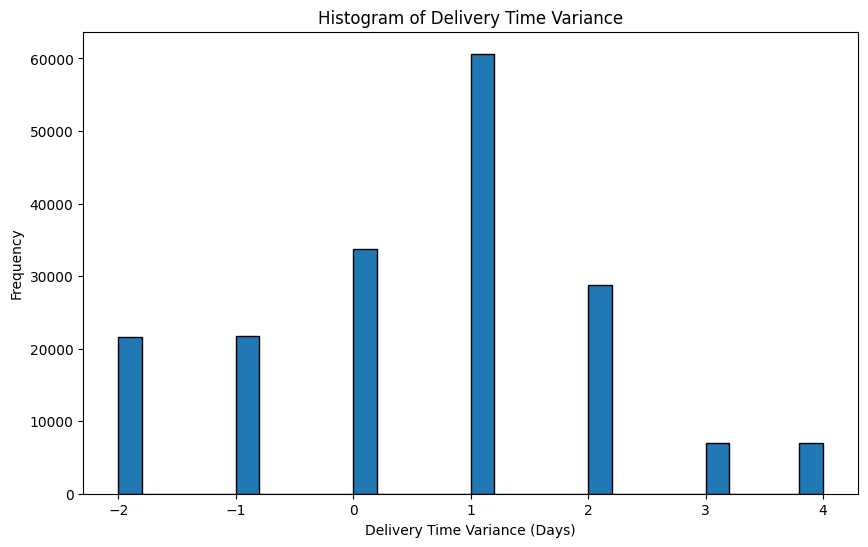

In [58]:
# Histogram of Delivery Time Variance

plt.figure(figsize=(10, 6))
plt.hist(ohe_data['Delivery Time Variance'], bins=30, edgecolor='black')
plt.title("Histogram of Delivery Time Variance")
plt.xlabel("Delivery Time Variance (Days)")
plt.ylabel("Frequency")
plt.show()